In [1]:
# 마운트 할 때 파일을 자기 드라이브에 넣어야한다.
# 그렇지 않으면 파일을 따로 가져오기.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# 자신이 저장한 파일경로로 변경해야함
# 위에는 원본 float64고 아래는 분석하기위한 float32이다.
csv_data = pd.read_csv("/content/drive/MyDrive/AI/Dog/DogMoveData_csv_format/DogMoveData.csv")

float_cols = [c for c in csv_data if csv_data[c].dtype == "float64"]
float32_cols = {c: np.float32 for c in float_cols}

data = pd.read_csv("/content/drive/MyDrive/AI/Dog/DogMoveData_csv_format/DogMoveData.csv", engine='c', dtype=float32_cols)


In [ ]:
data

,DogID,TestNum,t_sec,ABack_x,ABack_y,ABack_z,ANeck_x,ANeck_y,ANeck_z,GBack_x,GBack_y,GBack_z,GNeck_x,GNeck_y,GNeck_z,Task,Behavior_1,Behavior_2,Behavior_3,PointEvent
0,16,1,0.000000,0.041504,0.938965,-0.015137,-0.067871,-0.510254,-0.934570,-17.639160,-22.766115,7.446290,-7.934571,6.347657,13.427735,<undefined>,<undefined>,<undefined>,<undefined>,<undefined>
1,16,1,0.010000,0.041992,0.941895,-0.020020,-0.128906,-0.494141,-0.913086,-15.075685,-11.413575,4.821778,-3.906250,4.394532,16.540527,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
2,16,1,0.020000,0.040527,0.939453,-0.004395,-0.158691,-0.480469,-0.911133,-12.207032,-0.122070,2.807617,-0.488281,-1.953125,26.794436,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
3,16,1,0.030000,0.021484,0.946289,0.007813,-0.122070,-0.486816,-0.880371,-9.460450,7.995606,1.586914,1.159668,-5.676270,38.085941,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
4,16,1,0.040000,-0.000977,0.951172,0.033691,-0.053711,-0.500000,-0.807129,-8.361817,14.587403,-1.037598,4.577637,4.089356,41.503910,<undefined>,Synchronization,<undefined>,<undefined>,<undefined>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611063,74,2,1928.189941,0.018066,0.436523,0.808105,-0.620605,0.326172,-0.647949,23.620607,75.317390,77.148445,-124.511726,107.727058,-122.497566,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611064,74,2,1928.199951,-0.021973,0.515625,0.813965,-0.671875,0.241211,-0.660645,34.729008,63.293461,79.956062,-116.455086,97.534187,-123.229988,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611065,74,2,1928.209961,-0.041504,0.507324,0.782227,-0.674805,0.244629,-0.627930,39.978031,49.316410,84.655769,-104.858406,95.458992,-124.816902,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>
10611066,74,2,1928.219971,-0.032715,0.484375,0.824219,-0.685059,0.211426,-0.578613,38.024906,32.775883,89.538582,-87.463387,101.257332,-128.601089,Task treat-search,Sniffing,<undefined>,<undefined>,<undefined>


In [ ]:
#데이터 타입 확인하기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10611068 entries, 0 to 10611067
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   DogID       int64  
 1   TestNum     int64  
 2   t_sec       float32
 3   ABack_x     float32
 4   ABack_y     float32
 5   ABack_z     float32
 6   ANeck_x     float32
 7   ANeck_y     float32
 8   ANeck_z     float32
 9   GBack_x     float32
 10  GBack_y     float32
 11  GBack_z     float32
 12  GNeck_x     float32
 13  GNeck_y     float32
 14  GNeck_z     float32
 15  Task        object 
 16  Behavior_1  object 
 17  Behavior_2  object 
 18  Behavior_3  object 
 19  PointEvent  object 
dtypes: float32(13), int64(2), object(5)
memory usage: 1.1+ GB


In [ ]:
#데이터 학습용과 훈련용으로 나누기

X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')

ValueError: ignored

In [ ]:
# 자신이 저장한 파일경로로 변경해야함
excel_data = pd.read_excel("/content/drive/MyDrive/AI/Dog/DogInfo.xlsx")
excel_data.head(45)

,DogID,Breed,Weight,Age months,Gender,NeuteringStatus
0,16,Crossbreed,13,20,1,0
1,18,Belgian Shepherd,29,76,2,0
2,19,German Shepherd,30,57,1,0
3,20,Border Collie,15,47,1,0
4,21,Golden Retriever,39,19,2,0
5,22,Beauceron,35,20,2,0
6,23,Labrador Retriever,23,113,1,1
7,25,Finnish Lapphund,26,88,2,1
8,26,Spanish Water Dog,20,47,2,0
9,27,Mudi,16,99,2,1


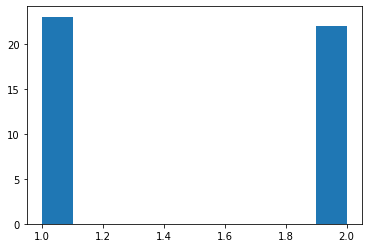

In [ ]:
plt.hist(excel_data['Gender'])
